# Predicting type of breast cancer using MP neuron model:

## 1. Load data:

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
type(breast_cancer)

sklearn.utils.Bunch

In [5]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [7]:
print(breast_cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [8]:
print(breast_cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [11]:
breast_cancer = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data,columns = breast_cancer.feature_names)
data['class'] = breast_cancer.target

In [12]:
print(data.head(10))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

In [13]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [14]:
print(breast_cancer.target_names)
print(data['class'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: class, dtype: int64


In [15]:
data.groupby('class').describe()

mean radius                                                             \
            count       mean       std     min     25%     50%    75%    max   
class                                                                          
0           212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11   
1           357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85   

      mean texture             ... worst symmetry          \
             count       mean  ...            75%     max   
class                          ...                          
0            212.0  21.604906  ...       0.359225  0.6638   
1            357.0  17.914762  ...       0.298300  0.4228   

      worst fractal dimension                                                  \
                        count      mean       std      min       25%      50%   
class                                                                           
0                       212.0  0.091530  0.021553  0.05504  0.076302  0.08760   
1                       357.0  0.079442  0.013804  0.05521  0.070090  0.07712   

                         
            75%     max  
class                    
0      0.102625  0.2075  
1      0.085410  0.1486  

[2 rows x 240 columns]

# 2. Train Test Split:

In [16]:
from sklearn.model_selection import train_test_split

In [44]:
X = data.drop('class',axis = 1)
Y = data['class']


In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify = Y,random_state = 1,test_size = 0.1)

Explaining each parameters:
- stratify -> it will split the data in such way that both train and test data will have similar number of features. eg. here both test and train datasets will have almost equal number of records with benign and maligment cancers.
- random_state -> it is the seed value provided to function. If you that function gives same data every time then manually set seed value
- test_size -> It is the ratio of test data size and total data size

In [46]:
print(X_train.shape, X_test.shape)

(512, 30) (57, 30)


See 90% records is in train and rest is in test.

In [50]:
print(Y_train.mean())
print(Y_test.mean())

0.626953125
0.631578947368421


See there is an almost similar distribution in train and test dataset

## 3. Binarisation of data:

since MP neuron only takes binary inputs. So we need to binarise the data.

Here is how the data is spreaded.

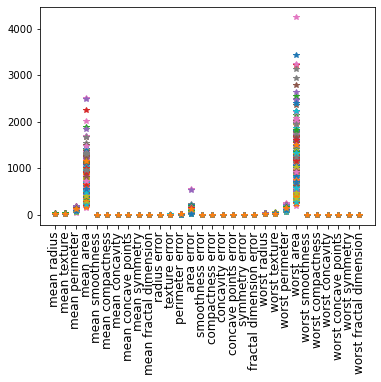

In [57]:
plt.plot(X_train.T,'*')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.show()

In [58]:
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels = [0,1])

In [59]:
type(X_binarised_train)

pandas.core.frame.DataFrame

Using pandas.cut to divide data in two halves with labels 0 and 1.

Now plot this data

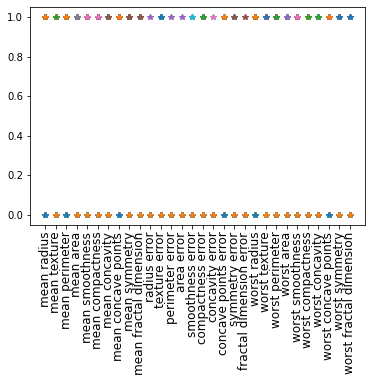

In [60]:
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.show()

Similarly do for X_test

In [61]:
X_binarised_test = X_test.apply(pd.cut,bins = 2, labels = [0,1])
# convert to np array 
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

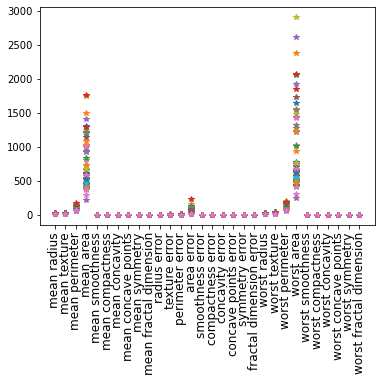

In [65]:
plt.plot(X_test.T,'*')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.show()

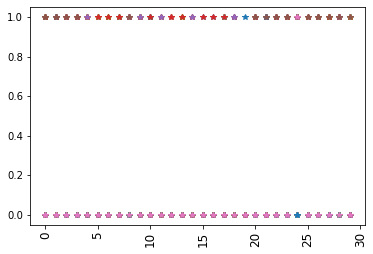

In [66]:
plt.plot(X_binarised_test.T,"*")
plt.xticks(rotation = 'vertical',fontsize = 'large')
plt.show()

## 3. Learning parameters

MP neuron model have only one parameter. So brute force search can be used to find that parameter.
So we will try different values of b ($w_0$) and stop when we find the value which minimize the loss function.
- $\sum{x_i} \geq b $ then y = 1,otherwise y = 0.
- So the maximum value of this sum can be ( in this problem ) 30. Since there 30 parameters.
- So we will iterate through all the values in the range of 0 to 30, And calculate the loss function. The value of b which will give the min value of loss function will be set.

In [67]:
print(X_binarised_train.shape)

(512, 30)


In [68]:
print(Y_train.shape)

(512,)


In [69]:
X_binarised_train.shape[1]

30

In [70]:
b = 0
accurate_rows = 0
y_pred_train = []
times=0

for b in range(X_binarised_train.shape[1] + 1):
    for x,y in zip(X_binarised_train,Y_train):
        #print(len(x))
        y_pred = (np.sum(x) >= b)
        accurate_rows += (y == y_pred)
        y_pred_train.append(y_pred)
        #times=times+1
    print(b, accurate_rows, accurate_rows / X_binarised_train.shape[0])
    accurate_rows = 0
    #times=0

0 321 0.626953125
1 123 0.240234375
2 95 0.185546875
3 77 0.150390625
4 79 0.154296875
5 93 0.181640625
6 110 0.21484375
7 125 0.244140625
8 141 0.275390625
9 153 0.298828125
10 160 0.3125
11 168 0.328125
12 172 0.3359375
13 176 0.34375
14 180 0.3515625
15 183 0.357421875
16 188 0.3671875
17 189 0.369140625
18 191 0.373046875
19 191 0.373046875
20 191 0.373046875
21 191 0.373046875
22 191 0.373046875
23 191 0.373046875
24 191 0.373046875
25 191 0.373046875
26 191 0.373046875
27 191 0.373046875
28 191 0.373046875
29 191 0.373046875
30 191 0.373046875


Here we can see that maximum accuracy we are getting is 62%, which is happened when we prediced all the output as 1 but our model should atleast give more accuracy than this. Reason for such accuracy is misclassification of inputs during binarisation. 

In [71]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Observe the table given above.
- We can see that mean value of all the parameters for the input labeled 0 have higher value than the corresponding mean values of the parameter for the input labeled 1.
- But during binarisation we labeled inputs with higher value as 1 and labeled others with 1.
- Now trying again after interchanging this label.

## 4. Binarisation of data and learning parameters ( Again! )

In [72]:
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels = [1,0])
X_binarised_test = X_test.apply(pd.cut,bins = 2 , labels = [1,0])
# Convert dataframes to np arrays
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [73]:
b = 0 
y_pred_train = []
accurate_row = 0
for b in range(X_binarised_train.shape[1] + 1):
    for x,y in zip(X_binarised_train,Y_train):
        y_pred = (np.sum(x) >= b)
        accurate_rows += (y_pred == y)
        y_pred_train.append(y_pred)
    print(b,accurate_rows, accurate_rows / X_binarised_train.shape[0])
    accurate_rows = 0

0 321 0.626953125
1 321 0.626953125
2 321 0.626953125
3 321 0.626953125
4 321 0.626953125
5 321 0.626953125
6 321 0.626953125
7 321 0.626953125
8 321 0.626953125
9 321 0.626953125
10 321 0.626953125
11 321 0.626953125
12 321 0.626953125
13 321 0.626953125
14 323 0.630859375
15 324 0.6328125
16 329 0.642578125
17 332 0.6484375
18 336 0.65625
19 340 0.6640625
20 344 0.671875
21 352 0.6875
22 359 0.701171875
23 371 0.724609375
24 387 0.755859375
25 402 0.78515625
26 419 0.818359375
27 433 0.845703125
28 435 0.849609375
29 417 0.814453125
30 389 0.759765625


As we can see the maximum accuracy has increased to 85%. It is achieved when b = 28.

## 5. Evaluation on test data:

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
b = 28

y_pred_test = []

for x in X_binarised_test:
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)

accuracy = accuracy_score(y_pred_test,Y_test)
print(accuracy)

0.7894736842105263


## Extra: MP Neuron class:
lets make class for MP neuron.

In [76]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self,x):
        return (sum(x) >= self.b)
    
    def predict(self,X):
        y = []
        for x in X:
            result = self.model(x)
            y.append(result)
        return np.array(y)
    
    def fit(self,X,Y):
        accuracy = {}
        
        for b in range(0, X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred,Y)
            
        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
        
        print('Optimal value of b :',best_b)
        print('Highest accuracy :',accuracy[best_b])
            

In [77]:
mpn = MPNeuron()
mpn.fit(X_binarised_train,Y_train)

Optimal value of b : 28
Highest accuracy : 0.849609375


In [78]:
y_test_pred = mpn.predict(X_binarised_test)
accuarcy = accuracy_score(y_test_pred,Y_test)
print(accuracy)

0.7894736842105263


## Try it Out

In [173]:
# load the ionosphere dataset and summarize the shape
from pandas import read_csv
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
# load the dataset
df = read_csv(url, header=None)
# summarize shape
print(df.shape)

(351, 35)


Johns Hopkins University Ionosphere database
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. 

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this database are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

The targets were free electrons in the ionosphere. “Good” (g) radar returns are those showing evidence of some type of structure in the ionosphere. “Bad” (b) returns are those that do not; their signals pass through the ionosphere

In [174]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


1) Check for any null values.<br>
2) Do some visulaization / Atleast 2 plotting.<br>
3) BInarize the data.<br>
4) Apply MP neuron model on the data set and compute /display the accuracy 

In [175]:
#1. Checking for Null values.
df.isnull()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
347,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
348,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
349,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [176]:
df.isnull().sum(axis=0)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

**There are no null values present in the dataframe**

In [177]:
print(df[34].value_counts())

g    225
b    126
Name: 34, dtype: int64


Here we have two classes g and b

In [178]:
df.groupby(34).describe()

0                                                   1        ...  \
    count      mean       std  min  25%  50%  75%  max  count mean  ...   
34                                                                  ...   
b   126.0  0.698413  0.460779  0.0  0.0  1.0  1.0  1.0  126.0  0.0  ...   
g   225.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  225.0  0.0  ...   

          32          33                                              \
         75%  max  count      mean       std  min       25%      50%   
34                                                                     
b   0.555495  1.0  126.0  0.054582  0.565575 -1.0 -0.055735  0.00000   
g   0.821430  1.0  225.0 -0.007977  0.403492 -1.0 -0.220340 -0.00543   

                   
         75%  max  
34                 
b   0.228225  1.0  
g   0.166670  1.0  

[2 rows x 272 columns]

In [179]:
X = df.drop(34,axis = 1)
Y = df[34]
Y.replace(to_replace=['g','b'],value=[0,1],inplace=True)

In [180]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,stratify = Y,random_state = 1,test_size = 0.1)

In [181]:
print(X_train.shape, X_test.shape)

(315, 34) (36, 34)


In [182]:
print(Y_train.mean())
print(Y_test.mean())

0.35873015873015873
0.3611111111111111


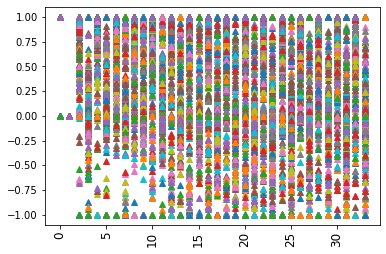

In [183]:
plt.plot(X_train.T,'^')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.show()

Before Binarization of the train dataset.

In [184]:
#Binarisation of data.
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels = [0,1]) #Binarization into 0's and 1's for MP neuron

In [185]:
type(X_binarised_train)

pandas.core.frame.DataFrame

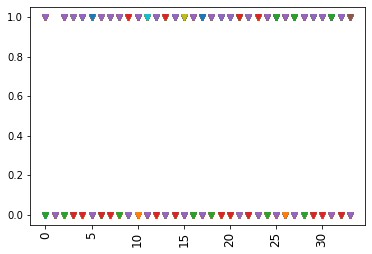

In [191]:
plt.plot(X_binarised_train.T,'v')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.show()

After Binarizaton of the data

In [187]:
X_binarised_test = X_test.apply(pd.cut,bins = 2, labels = [0,1])
# convert to np array 
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

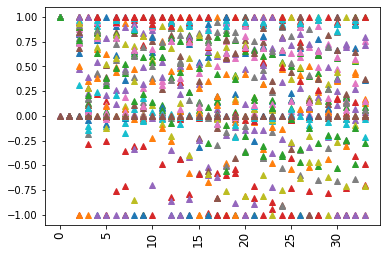

In [188]:
plt.plot(X_test.T,'^')
plt.xticks(rotation = 'vertical', fontsize = 'large')
plt.show()

Similarly, we are doing for the test dataset.

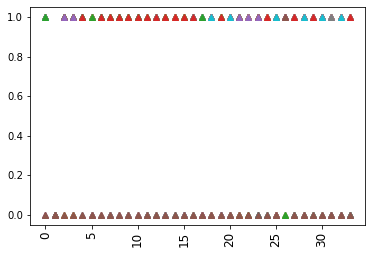

In [190]:
plt.plot(X_binarised_test.T,"^")
plt.xticks(rotation = 'vertical',fontsize = 'large')
plt.show()

In [192]:
b = 0
accurate_rows = 0
y_pred_train = []
times=0

for b in range(X_binarised_train.shape[1] + 1):
    for x,y in zip(X_binarised_train,Y_train):
        y_pred = (np.sum(x) >= b)
        accurate_rows += (y == y_pred)
        y_pred_train.append(y_pred)
    print(b, accurate_rows, accurate_rows / X_binarised_train.shape[0])
    accurate_rows = 0

0 113 0.35873015873015873
1 113 0.35873015873015873
2 112 0.35555555555555557
3 111 0.3523809523809524
4 111 0.3523809523809524
5 111 0.3523809523809524
6 110 0.3492063492063492
7 107 0.3396825396825397
8 102 0.3238095238095238
9 99 0.3142857142857143
10 93 0.29523809523809524
11 89 0.28253968253968254
12 80 0.25396825396825395
13 74 0.23492063492063492
14 67 0.2126984126984127
15 64 0.20317460317460317
16 55 0.1746031746031746
17 56 0.17777777777777778
18 82 0.26031746031746034
19 93 0.29523809523809524
20 101 0.32063492063492066
21 114 0.3619047619047619
22 121 0.38412698412698415
23 123 0.3904761904761905
24 132 0.41904761904761906
25 141 0.44761904761904764
26 144 0.45714285714285713
27 149 0.473015873015873
28 154 0.4888888888888889
29 161 0.5111111111111111
30 164 0.5206349206349207
31 172 0.546031746031746
32 181 0.5746031746031746
33 191 0.6063492063492063
34 202 0.6412698412698413


Here the maximum accuracy that we ar getting is ~64.1%

In [193]:
X_binarised_train = X_train.apply(pd.cut,bins = 2, labels = [1,0])
X_binarised_test = X_test.apply(pd.cut,bins = 2 , labels = [1,0])
# Convert dataframes to np arrays
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [194]:
b = 0 
y_pred_train = []
accurate_row = 0
for b in range(X_binarised_train.shape[1] + 1):
    for x,y in zip(X_binarised_train,Y_train):
        y_pred = (np.sum(x) >= b)
        accurate_rows += (y_pred == y)
        y_pred_train.append(y_pred)
    print(b,accurate_rows, accurate_rows / X_binarised_train.shape[0])
    accurate_rows = 0

0 113 0.35873015873015873
1 113 0.35873015873015873
2 124 0.39365079365079364
3 134 0.4253968253968254
4 143 0.45396825396825397
5 151 0.4793650793650794
6 154 0.4888888888888889
7 161 0.5111111111111111
8 166 0.526984126984127
9 171 0.5428571428571428
10 174 0.5523809523809524
11 183 0.580952380952381
12 192 0.6095238095238096
13 194 0.6158730158730159
14 201 0.638095238095238
15 214 0.6793650793650794
16 222 0.7047619047619048
17 233 0.7396825396825397
18 259 0.8222222222222222
19 260 0.8253968253968254
20 251 0.7968253968253968
21 248 0.7873015873015873
22 241 0.765079365079365
23 235 0.746031746031746
24 226 0.7174603174603175
25 222 0.7047619047619048
26 216 0.6857142857142857
27 213 0.6761904761904762
28 208 0.6603174603174603
29 205 0.6507936507936508
30 204 0.6476190476190476
31 204 0.6476190476190476
32 204 0.6476190476190476
33 203 0.6444444444444445
34 202 0.6412698412698413


After re-Binarisation of the data we are getting accuracy of about ~82.5% at 19.

In [195]:
b = 19

y_pred_test = []

for x in X_binarised_test:
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)

accuracy = accuracy_score(y_pred_test,Y_test)
print(accuracy)

0.8333333333333334


In [196]:
#4.Applying MP neuron.
mpn = MPNeuron()
mpn.fit(X_binarised_train,Y_train)

Optimal value of b : 19
Highest accuracy : 0.8253968253968254


In [197]:
y_test_pred = mpn.predict(X_binarised_test)
accuarcy = accuracy_score(y_test_pred,Y_test)
print(accuracy)

0.8333333333333334
